In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import numpy as np
import matplotlib.pyplot as plt
spark = SparkSession \
    .builder \
    .appName("Case Study Data Exploration") \
    .config("spark.sql.broadcastTimeout", "36000") \
    .getOrCreate()
orders_date = spark.read.csv('orders_date.csv',header=True)
orders_tickets = spark.read.csv('orders_tickets.csv',header=True)

In [2]:
orders_date.count()

2054059

In [3]:
orders_tickets.count()

1999716

In [2]:
orders_date = orders_date.drop_duplicates()
orders_tickets = orders_tickets.drop_duplicates()
orders = orders_date.join(orders_tickets,orders_date['id'] == orders_tickets['id']).drop(orders_tickets['id'])
orders = orders.withColumn('date',F.to_date(orders['date']).alias('date'))
orders = orders.withColumn('month',F.month(orders['date']).alias('month'))
orders = orders.withColumn('year',F.year(orders['date']).alias('year'))
orders = orders.withColumn('week', F.date_format('date', 'u').alias('week'))
orders = orders.withColumn('day', F.dayofmonth('date').alias('day'))

In [5]:
orders.count()

1997450

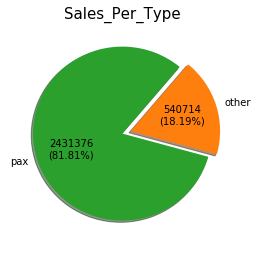

In [6]:
sales_per_type = orders.groupBy('type').agg({'n_tickets': 'sum'}).orderBy('sum(n_tickets)',ascending = False)
sales_per_type_rdd = sales_per_type.rdd.map(lambda row : (row[0],row[1]))
type = sales_per_type_rdd.map(lambda row :row[0]).collect()
sales = sales_per_type_rdd.map(lambda row : row[1]).collect()
plt.figure(figsize=plt.figaspect(1))
explode = (0, 0.1)  # explode 1st slice
colors =['C2','C1']
def make_autopct(value):
    def my_autopct(pct):
        total = sum(value)
        val = int(round(pct*total/100.0))
        return '{v:d}\n({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct
plt.pie(sales, explode=explode,labels=type, shadow=True,autopct=make_autopct(sales),startangle=50,colors = colors)
plt.title('Sales_Per_Type',size=15)
plt.savefig('Figures/Sales_Per_Type.eps', format='eps',bbox_inches='tight',transparent=True)
plt.show()

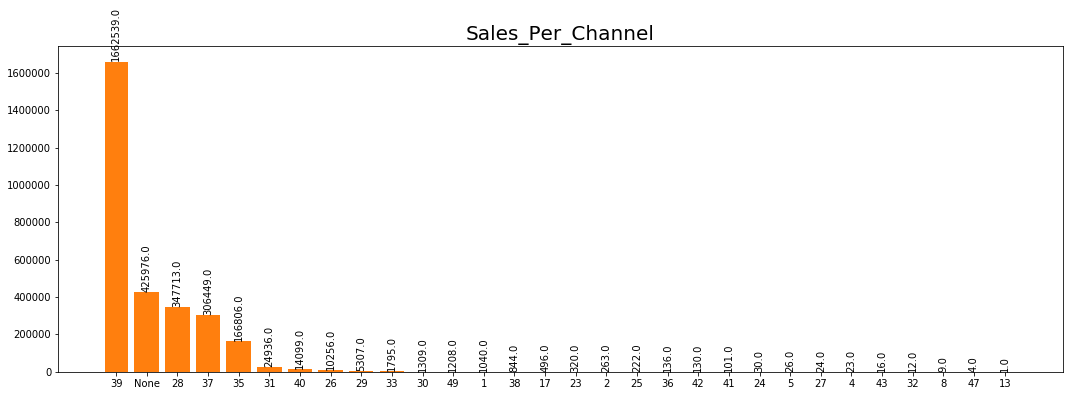

In [7]:
sales_per_channel = orders.groupBy('channel_id').agg({'n_tickets': 'sum'}).orderBy('sum(n_tickets)',ascending = False)
sales_per_channel_rdd = sales_per_channel.rdd.map(lambda row : (row[0],row[1]))
channel = sales_per_channel_rdd.map(lambda row :row[0]).collect()
sales = sales_per_channel_rdd.map(lambda row : row[1]).collect()
plt.rcParams["figure.figsize"] = (18, 6)
X = np.arange(len(channel))
plt.bar(X, sales, width=0.8, edgecolor='white', align='center',color = 'C1')
plt.title('Sales_Per_Channel', size=20)

for a, b in zip(X, sales):
    plt.text(a, b, str(b), ha='center', va='bottom',rotation = 90)

plt.xticks(X, channel)
plt.savefig('Figures/Sales_Per_Channel.eps', format='eps',bbox_inches='tight',transparent=True)
# plt.xlabel('language',size=15)
# plt.ylabel('Tweet_count',size=15)
plt.show()

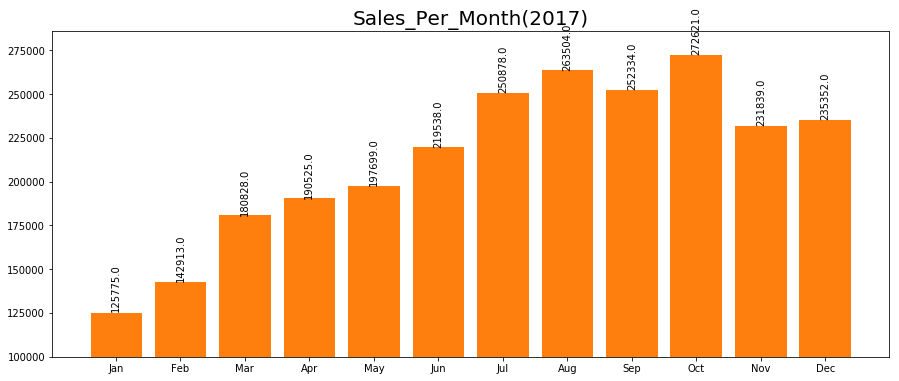

In [343]:
sales_per_month = orders.filter(orders['year'] == 2017).groupBy('month').agg({'n_tickets': 'sum'}).orderBy('month',ascending = True)
sales_per_month_rdd = sales_per_month.rdd.map(lambda row : (row[0],row[1]))
month = sales_per_month_rdd.map(lambda row :row[0]).collect()
sales = sales_per_month_rdd.map(lambda row : row[1]).collect()
plt.rcParams["figure.figsize"] = (15, 6)
X = np.arange(len(month))
plt.bar(X, sales, width=0.8, edgecolor='white', align='center',color= 'C1')
plt.title('Sales_Per_Month(2017)', size=20)

for a, b in zip(X, sales):
    plt.text(a, b, str(b), ha='center', va='bottom',rotation = 90)

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(X, month)
plt.ylim(ymin=100000)
plt.savefig('Figures/Sales_Per_Month(2017).eps', format='eps',bbox_inches='tight',transparent=True)
# plt.xlabel('language',size=15)
# plt.ylabel('Tweet_count',size=15)
plt.show()

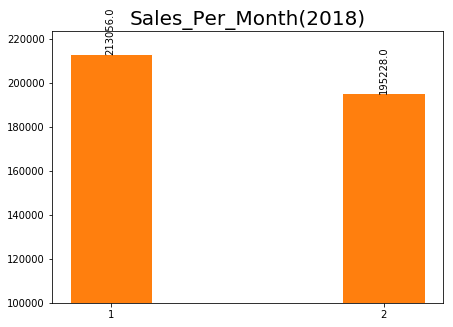

In [344]:
sales_per_month = orders.filter(orders['year'] == 2018).groupBy('month').agg({'n_tickets': 'sum'}).orderBy('month',ascending = True)
sales_per_month_rdd = sales_per_month.rdd.map(lambda row : (row[0],row[1]))
month = sales_per_month_rdd.map(lambda row :row[0]).collect()
sales = sales_per_month_rdd.map(lambda row : row[1]).collect()
plt.rcParams["figure.figsize"] = (7, 5)
X = np.arange(len(month))
plt.bar(X, sales, width=0.3, edgecolor='white', align='center',color= 'C1')
plt.title('Sales_Per_Month(2018)', size=20)

for a, b in zip(X, sales):
    plt.text(a, b, str(b), ha='center', va='bottom',rotation = 90)

#month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(X, month)
plt.ylim(ymin=100000)
plt.savefig('Figures/Sales_Per_Month(2018).eps', format='eps',bbox_inches='tight',transparent=True)
# plt.xlabel('language',size=15)
# plt.ylabel('Tweet_count',size=15)
plt.show()

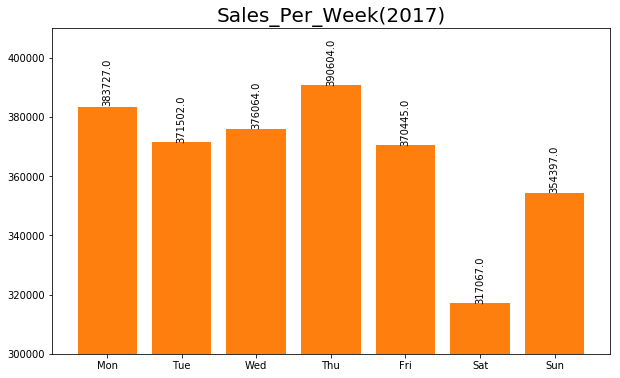

In [345]:
sales_per_week = orders.filter(orders['year'] == 2017).groupBy('week').agg({'n_tickets': 'sum'}).orderBy('week',ascending = True)
sales_per_week_rdd = sales_per_week.rdd.map(lambda row : (row[0],row[1]))
week = sales_per_week_rdd.map(lambda row :row[0]).collect()
sales = sales_per_week_rdd.map(lambda row : row[1]).collect()#
plt.rcParams["figure.figsize"] = (10, 6)
X = np.arange(len(week))
plt.bar(X, sales, width=0.8, edgecolor='white', align='center',color = 'C1')
plt.title('Sales_Per_Week(2017)', size=20)

for a, b in zip(X, sales):
    plt.text(a, b, str(b), ha='center', va='bottom',rotation = 90)
week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(X, week)
plt.ylim(ymin=300000)
plt.savefig('Figures/Sales_Per_Week(2017).eps', format='eps',bbox_inches='tight',transparent=True)
# plt.xlabel('language',size=15)
# plt.ylabel('Tweet_count',size=15)
plt.show()

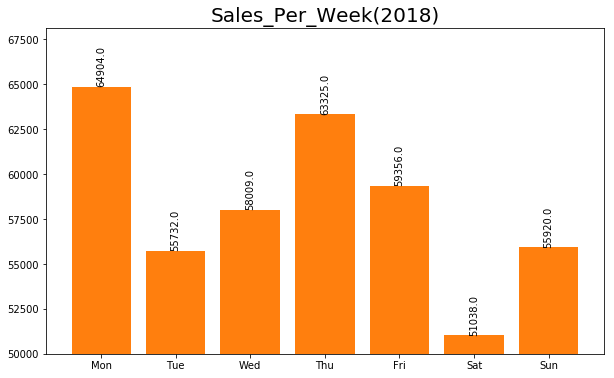

In [346]:
sales_per_week = orders.filter(orders['year'] == 2018).groupBy('week').agg({'n_tickets': 'sum'}).orderBy('week',ascending = True)
sales_per_week_rdd = sales_per_week.rdd.map(lambda row : (row[0],row[1]))
week = sales_per_week_rdd.map(lambda row :row[0]).collect()
sales = sales_per_week_rdd.map(lambda row : row[1]).collect()#
plt.rcParams["figure.figsize"] = (10, 6)
X = np.arange(len(week))
plt.bar(X, sales, width=0.8, edgecolor='white', align='center',color = 'C1')
plt.title('Sales_Per_Week(2018)', size=20)

for a, b in zip(X, sales):
    plt.text(a, b, str(b), ha='center', va='bottom',rotation = 90)
week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(X, week)
plt.ylim(ymin=50000)
plt.savefig('Figures/Sales_Per_Week(2018).eps', format='eps',bbox_inches='tight',transparent=True)
# plt.xlabel('language',size=15)
# plt.ylabel('Tweet_count',size=15)
plt.show()